In [ ]:
#start

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import cv2
import uuid
import os



In [ ]:
!apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.11-0ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [ ]:
!apt install python3.6-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.6-dev is already the newest version (3.6.9-1~18.04ubuntu1.8).
python3.6-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.


In [ ]:
!pip install ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6084 sha256=326c74bf8ba791ff47f7f1d18c2c87cb439ae6692deb41d34a7bb8f1fbcaaf60
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg


440 460


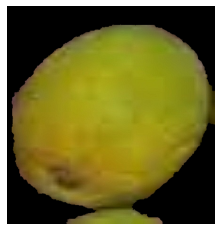

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_bgr = cv2.imread('sharped_image.jpg')
height, width = image_bgr.shape[:2]
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

print(width,height)
rectangle = (10,10, width,height)

mask = np.zeros(image_rgb.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

cv2.grabCut(image_rgb, mask, rectangle, bgdModel, fgdModel, 15, cv2.GC_INIT_WITH_RECT)

mask_2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

image_rgd_nobg = image_rgb * mask_2[:, :, np.newaxis]
cv2.imwrite("BGRemoved.jpg", cv2.cvtColor(image_rgd_nobg, cv2.COLOR_RGB2BGR))
plt.imshow(image_rgd_nobg), plt.axis('off')
plt.show()

In [ ]:
image = cv2.imread("BGRemoved.jpg")
for i in range(height):
  for j in range(width):
    pixel=image[i,j]
    if pixel[0]!=0 and pixel[1]!=0 and pixel[2]!=0:
      print(pixel)

Streaming output truncated to the last 5000 lines.
[ 4 59 66]
[ 6 60 67]
[ 6 61 68]
[ 5 59 66]
[ 7 62 69]
[ 3 57 64]
[ 4 59 66]
[ 4 58 65]
[ 4 59 66]
[ 1 55 62]
[ 1 56 63]
[ 1 55 62]
[ 1 57 62]
[ 1 58 60]
[ 2 59 60]
[ 1 58 59]
[ 4 61 62]
[ 1 58 59]
[ 3 60 61]
[ 1 58 59]
[ 3 60 61]
[ 3 60 61]
[ 2 59 60]
[ 3 60 61]
[ 1 58 59]
[ 4 60 61]
[ 1 57 58]
[ 2 58 59]
[ 3 57 58]
[ 6 57 60]
[ 5 56 59]
[ 6 57 60]
[ 3 57 58]
[ 9 58 60]
[ 6 50 51]
[18 49 52]
[4 1 3]
[53 72 80]
[47 71 83]
[47 74 88]
[41 74 89]
[38 72 88]
[44 80 98]
[ 47  83 101]
[37 73 91]
[45 81 99]
[40 75 95]
[44 80 98]
[ 47  86 101]
[ 47  86 100]
[ 48  87 102]
[36 77 92]
[39 80 95]
[31 74 89]
[33 78 92]
[31 76 90]
[32 78 95]
[25 71 88]
[28 74 91]
[24 70 87]
[25 70 84]
[24 69 83]
[21 66 80]
[14 61 75]
[19 67 79]
[10 61 71]
[ 6 57 67]
[ 6 55 65]
[12 61 71]
[13 62 72]
[13 62 72]
[10 59 69]
[ 9 55 66]
[ 7 53 64]
[ 4 51 59]
[ 7 54 62]
[ 5 51 59]
[11 57 65]
[ 6 52 60]
[ 8 54 62]
[ 7 54 62]
[ 3 53 59]
[ 3 53 59]
[ 4 54 60]
[ 3 53 59]
[ 7 5

In [ ]:
img = cv2.imread('mango2.jpeg')
print(f"Original Dimensions : {img.shape}")
resized = cv2.resize(img, (440, 460))
print(f"Resized Dimensions : {resized.shape}")
cv2.imwrite('resized_imaged.jpg', resized)

Original Dimensions : (74, 53, 3)
Resized Dimensions : (460, 440, 3)


True

In [ ]:
image = cv2.imread('resized_imaged.jpg', flags=cv2.IMREAD_COLOR)
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])
image_sharp = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
cv2.imwrite('sharped_image.jpg', image_sharp)

True

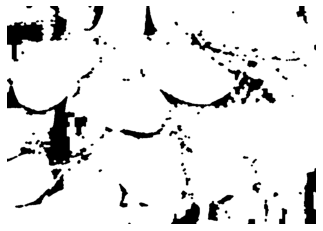

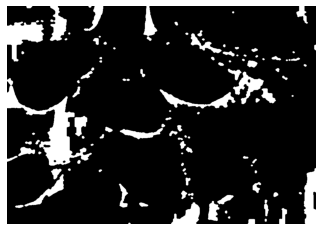

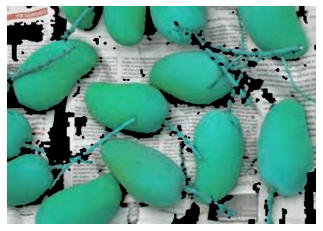

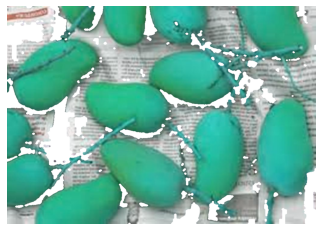

In [ ]:
import cv2
import numpy as np
img = cv2.imread("rawmango2.jpg")
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
range1 = (30,0,100)
range2 = (255,255,255)
mask = cv2.inRange(hsv,range1,range2)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.merge([mask,mask,mask])
mask_inv = 255 - mask
white = np.full_like(img, (255,255,255))
img_masked = cv2.bitwise_and(img, mask)
white_masked = cv2.bitwise_and(white, mask_inv)
result = cv2.add(img_masked, mask_inv)
cv2.imwrite("green_plant_mask.png", mask)
cv2.imwrite("green_plant_white_background.jpg", result)
plt.imshow(mask), plt.axis('off')
plt.show()
plt.imshow(mask_inv), plt.axis('off')
plt.show()
plt.imshow(img_masked), plt.axis('off')
plt.show()
plt.imshow(result), plt.axis('off')
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()
